# 서울시 구별 CCTV / 인구 분석

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
mpl.rcParams['axes.unicode_minus']=False
mpl.rcParams['font.family'] = 'Malgun Gothic'

In [8]:
#상대경로 읽어오기
df = pd.read_csv('../02.pandas/미니프로젝트/cctv_pop.csv',index_col='구별')
df.head()

,cctv댓수,최근증가율,인구수,내국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
종로구,1715,48.514851,153789,144683,9106,27818,5.92,18.09
중구,2447,80.106572,131787,122499,9288,24392,7.05,18.51
용산구,2611,80.692308,237285,222953,14332,39070,6.04,16.47
성동구,3829,68.644068,292672,285990,6682,46380,2.28,15.85
광진구,3211,115.654405,352627,339996,12631,51723,3.58,14.67


- 상관관계분석
   - cctv댓수 vs 인구수, 외국인비율,고령자 비율

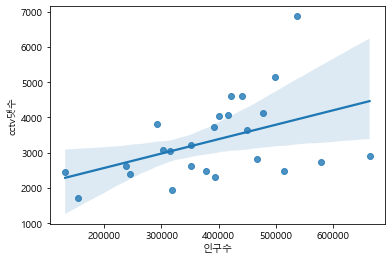

In [9]:
#cctv댓수 vs 인구수 /regplot : 회귀선 regression
sns.regplot(x='인구수', y='cctv댓수', data=df)
plt.show()

#쉐딩 부분은 95% 신뢰수준

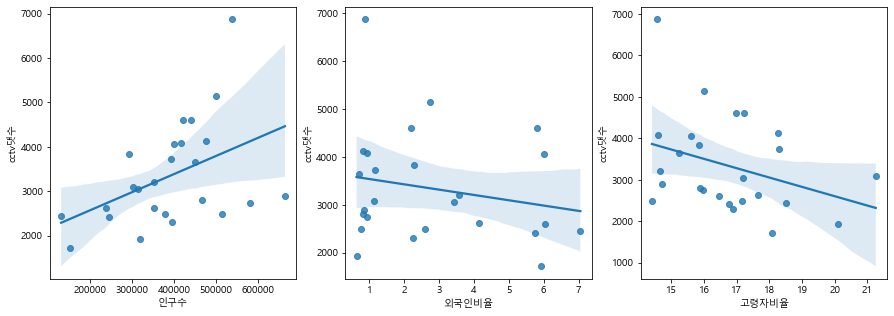

In [12]:
_, axs = plt.subplots(1,3, figsize=(15,5))
features = ['인구수','외국인비율','고령자비율']
for i, features in enumerate(features):
    sns.regplot(x=features, y='cctv댓수', data=df, ax=axs[i])

- 구별 cctv댓수 시각화

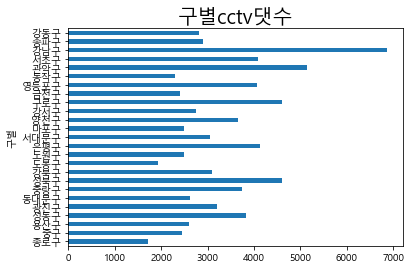

In [15]:
df.cctv댓수.plot(kind='barh')
plt.title('구별cctv댓수',fontsize=20)
plt.show()

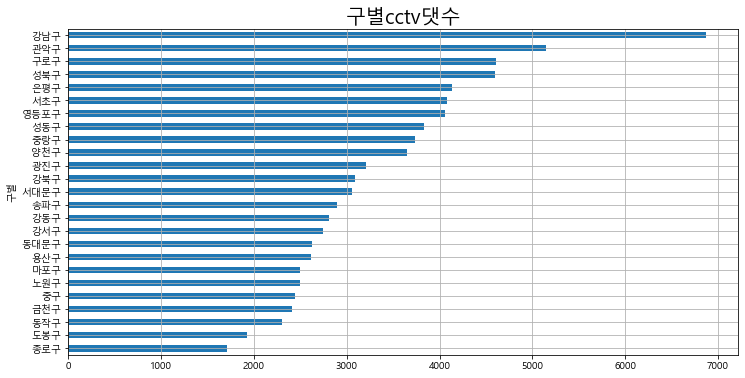

In [19]:
df.cctv댓수.sort_values().plot(kind='barh',grid=True,figsize=(12,6))    #sort_values() 오름차순
plt.title('구별cctv댓수',fontsize=20)
plt.show()

- 인구대비 cctv 비율 시각화

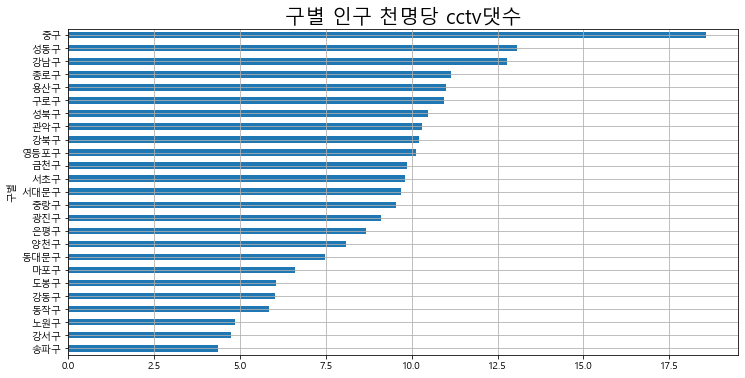

In [23]:
#천명당 cctv 댓수
# df['cctv비율'] = (df['cctv댓수']/(df['인구수']/1000)).round(2)
df['cctv비율'] = (df.cctv댓수/(df.인구수/1000)).round(2)
df.cctv비율.sort_values().plot(kind='barh',grid=True,figsize=(12,6))    #sort_values() 오름차순
plt.title('구별 인구 천명당 cctv댓수',fontsize=20)
plt.show()



### 인구수와 cctv 댓수 분석
  - 산점도(scatter plot)

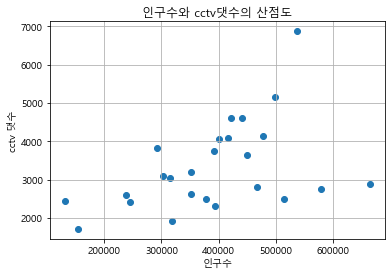

In [25]:
plt.scatter(x=df.인구수, y=df.cctv댓수)
plt.title('인구수와 cctv댓수의 산점도')
plt.xlabel('인구수'),plt.ylabel('cctv 댓수')
plt.grid();plt.show()

- 회귀선

In [29]:
#numpy
weight, bias = np.polyfit(df.인구수,df.cctv댓수, 1)      # (x, y ,차수)
weight,bias

(0.004085429243410676, 1751.2460231825626)

In [38]:
x = np.array([10000, 700000])
y = weight * x + bias           #bias : 사선
y

array([1792.10031562, 4611.04649357])

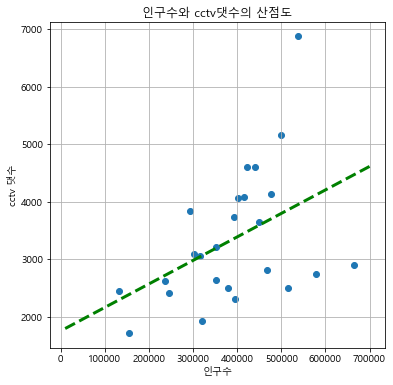

In [34]:
plt.figure(figsize=(6,6))
plt.scatter(x=df.인구수, y=df.cctv댓수)
plt.plot(x,y,'g--',lw=3)                #green(g), dashed(--)
plt.title('인구수와 cctv댓수의 산점도')
plt.xlabel('인구수'),plt.ylabel('cctv 댓수')
plt.grid();plt.show()

- 회귀선과 산점도 사이의 절대오차 (단차)

In [37]:
df['오차'] = abs(df.cctv댓수 - (df.인구수*weight+bias)).round(2)
df_sort = df.sort_values(by='오차', ascending=False)
df_sort.head()

,cctv댓수,최근증가율,인구수,내국인,외국인,고령자,외국인비율,고령자비율,cctv비율,오차
구별,,,,,,,,,,
강남구,6871,64.382845,537800,533042,4758,78226,0.88,14.55,12.78,2922.61
송파구,2897,213.757225,663965,658338,5627,97691,0.85,14.71,4.36,1566.83
강서구,2744,82.398155,579768,574315,5453,92558,0.94,15.96,4.73,1375.85
노원구,2492,68.471810,514946,510956,3990,88345,0.77,17.16,4.84,1363.02
관악구,5149,55.690915,499449,485699,13750,79871,2.75,15.99,10.31,1357.29


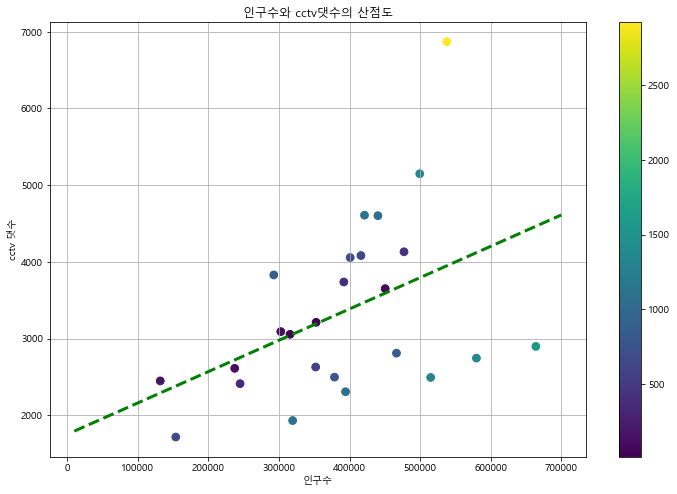

In [47]:
#점 사이즈와 색, 컬러바
plt.figure(figsize=(12,8))
plt.scatter(x=df.인구수, y=df.cctv댓수, c=df.오차, s=60)  # c= 는 색, s= 점의 크기
plt.plot(x,y,'g--',lw=3)                #green(g), dashed(--)
plt.title('인구수와 cctv댓수의 산점도')
plt.xlabel('인구수'),plt.ylabel('cctv 댓수')
plt.colorbar()
plt.grid();plt.show()

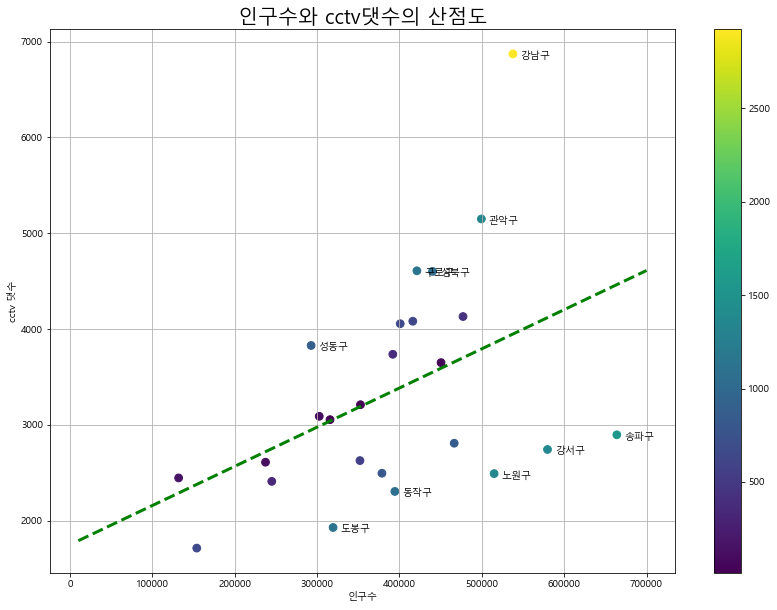

In [48]:
#점에 텍스트 붙히기
plt.figure(figsize=(14,10))
plt.scatter(x=df.인구수, y=df.cctv댓수, c=df.오차, s=60)  # c= 는 색, s= 점의 크기
plt.plot(x,y,'g--',lw=3)
for i in range(10):
    plt.text(df_sort.인구수[i]+9000,df_sort.cctv댓수[i]-50,     #(x,y,data)
            df_sort.index[i],fontsize=10)
plt.title('인구수와 cctv댓수의 산점도',fontsize=20)
plt.xlabel('인구수'),plt.ylabel('cctv 댓수')
plt.colorbar()
plt.grid();plt.show()